In [20]:
import numpy as np
import cv2
import os

In [29]:
train_path="C:/Users/Ali/data_py/three_pose_sorena_dataset/Train"
test_path="C:/Users/Ali/data_py/three_pose_sorena_dataset/Test"
Val_path="C:/Users/Ali/data_py/three_pose_sorena_dataset/Val"

In [8]:
X_train=[]
for folder in os.listdir(train_path):
    sub_path=train_path+"/"+folder
    for img in os.listdir(sub_path):
        image_path=sub_path+"/"+img
        img_arr=cv2.imread(image_path)
        img_arr=cv2.resize(img_arr,(224,224))
        X_train.append(img_arr)
    

In [9]:
len(X_train)

2100

In [10]:
X_test=[]
for folder in os.listdir(test_path):
    sub_path=test_path+"/"+folder
    for img in os.listdir(sub_path):
        image_path=sub_path+"/"+img
        img_arr=cv2.imread(image_path)
        img_arr=cv2.resize(img_arr,(224,224))
        X_test.append(img_arr)
X_val=[]
for folder in os.listdir(Val_path):
    sub_path=Val_path+"/"+folder
    for img in os.listdir(sub_path):
        image_path=sub_path+"/"+img
        img_arr=cv2.imread(image_path)
        img_arr=cv2.resize(img_arr,(224,224))
        X_val.append(img_arr)      

In [13]:
X_test=np.array(X_test)
X_train=np.array(X_train)
X_val=np.array(X_val)
X_test=X_test/255
X_train=X_train/255
X_val=X_val/255

TypeError: unsupported operand type(s) for /: 'builtin_function_or_method' and 'int'

In [75]:
Y_test=np.array(Y_test)
Y_train=np.array(Y_train)
Y_val=np.array(Y_val)

In [88]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()

Y_test=enc.fit_transform(Y_test)
Y_train=enc.fit_transform(Y_train)
Y_val=enc.fit_transform(Y_val)

array([0, 0, 0, ..., 2, 2, 2], dtype=int64)

In [30]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(        
        )


In [31]:
training_set = datagen.flow_from_directory(train_path,
                                                target_size=(224,224),
                                                 batch_size = 32,
                                                 shuffle=True,
                                                 class_mode = 'sparse')
test_set = datagen.flow_from_directory(test_path,
                                       target_size=(224,224),
                                            batch_size = 32,
                                          shuffle=True,
                                            class_mode = 'sparse')
Val_set = datagen.flow_from_directory(Val_path,
                                      target_size=(224,224),
                                            batch_size = 32,
                                          shuffle=True,
                                            class_mode = 'sparse')

Found 2100 images belonging to 3 classes.
Found 300 images belonging to 3 classes.
Found 600 images belonging to 3 classes.


In [48]:
train_y=training_set.classes
test_y=test_set.classes
val_y=Val_set.classes


In [49]:
s=training_set[0][0]

In [51]:
s

array([[[[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        ...,

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]]],


       [[[1., 1., 1.],
         [1., 1., 1.],
         [1., 

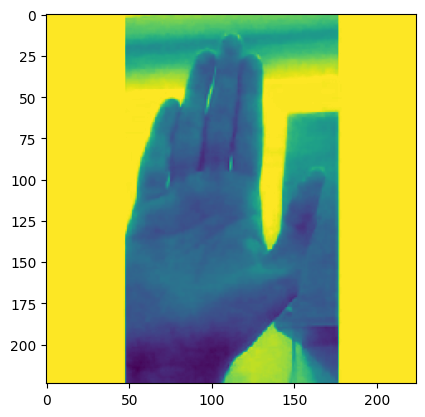

In [52]:
import matplotlib.pylab as plt
plt.imshow(s[20,:,:,2])

In [32]:
import tensorflow as tf
model=tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters=32 ,activation='relu',padding='Same' ,input_shape=(224,224,3) , kernel_size=(5,5)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Conv2D(filters=64 ,activation='relu',padding='Same' , kernel_size=(5,5)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Conv2D(filters=128 ,activation='relu' ,padding='Same' , kernel_size=(5,5)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Conv2D(filters=256 ,activation='relu',padding='Same'  , kernel_size=(5,5)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Conv2D(filters=512 ,activation='relu' , padding='Same', kernel_size=(5,5)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2) ))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=256 , activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(units=3 ,activation='softmax'))

In [14]:
# import necessary layers  
from tensorflow.keras.layers import Input, Conv2D 
from tensorflow.keras.layers import MaxPool2D, Flatten, Dense 
from tensorflow.keras import Model
# input

input = Input(shape =(224,224,3))
# 1st Conv Block

x = Conv2D (filters =64, kernel_size =3, padding ='same', activation='relu')(input)
x = Conv2D (filters =64, kernel_size =3, padding ='same', activation='relu')(x)
x = MaxPool2D(pool_size =2, strides =2, padding ='same')(x)
# 2nd Conv Block

x = Conv2D (filters =128, kernel_size =3, padding ='same', activation='relu')(x)
x = Conv2D (filters =128, kernel_size =3, padding ='same', activation='relu')(x)
x = MaxPool2D(pool_size =2, strides =2, padding ='same')(x)
# 3rd Conv block

x = Conv2D (filters =256, kernel_size =3, padding ='same', activation='relu')(x)
x = Conv2D (filters =256, kernel_size =3, padding ='same', activation='relu')(x)
x = Conv2D (filters =256, kernel_size =3, padding ='same', activation='relu')(x)
x = MaxPool2D(pool_size =2, strides =2, padding ='same')(x)
# 4th Conv block

x = Conv2D (filters =512, kernel_size =3, padding ='same', activation='relu')(x)
x = Conv2D (filters =512, kernel_size =3, padding ='same', activation='relu')(x)
x = Conv2D (filters =512, kernel_size =3, padding ='same', activation='relu')(x)
x = MaxPool2D(pool_size =2, strides =2, padding ='same')(x)

# 5th Conv block

x = Conv2D (filters =512, kernel_size =3, padding ='same', activation='relu')(x)
x = Conv2D (filters =512, kernel_size =3, padding ='same', activation='relu')(x)
x = Conv2D (filters =512, kernel_size =3, padding ='same', activation='relu')(x)
x = MaxPool2D(pool_size =2, strides =2, padding ='same')(x)
# Fully connected layers

x = Flatten()(x)
x = Dense(units = 4096, activation ='relu')(x)
x = Dense(units = 4096, activation ='relu')(x)
output = Dense(units = 1000, activation ='softmax')(x)
# creating the model

model = Model (inputs=input, outputs =output)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_10 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 conv2d_11 (Conv2D)          (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 112, 112, 64)      0         
 ng2D)                                                           
                                                                 
 conv2d_12 (Conv2D)          (None, 112, 112, 128)     73856     
                                                                 
 conv2d_13 (Conv2D)          (None, 112, 112, 128)     147584    
                                                             

In [33]:
model.compile(
  loss='sparse_categorical_crossentropy',
  optimizer="adam",
  metrics=['accuracy']
)
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=5)

In [39]:
batch_size=32  
model.fit(
        training_set,
        epochs=10,
        callbacks=[early_stop],
        validation_data=Val_set,
        )

Epoch 1/10
66/66 [==============================] - 155s 2s/step - loss: 0.0064 - accuracy: 0.9995 - val_loss: 0.5883 - val_accuracy: 0.9200
Epoch 2/10
66/66 [==============================] - 148s 2s/step - loss: 3.4527 - accuracy: 0.9314 - val_loss: 14.2376 - val_accuracy: 0.7967
Epoch 3/10
66/66 [==============================] - 148s 2s/step - loss: 0.6309 - accuracy: 0.9895 - val_loss: 5.9595 - val_accuracy: 0.7350
Epoch 4/10
66/66 [==============================] - 152s 2s/step - loss: 0.0474 - accuracy: 0.9967 - val_loss: 3.0049 - val_accuracy: 0.8983
Epoch 5/10
66/66 [==============================] - 155s 2s/step - loss: 0.0700 - accuracy: 0.9943 - val_loss: 4.1175 - val_accuracy: 0.9167
Epoch 6/10
66/66 [==============================] - 151s 2s/step - loss: 0.1769 - accuracy: 0.9976 - val_loss: 2.7387 - val_accuracy: 0.9500
Epoch 6: early stopping


In [40]:
model.save("three_pose_13.h5")

c:\Users\Ali\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [27]:
model.load("three_pose_11.h5")

AttributeError: 'Sequential' object has no attribute 'load'

In [22]:
import cv2
import numpy as np
import math
from cvzone.HandTrackingModule import HandDetector 
from cvzone.ClassificationModule import Classifier
cap=cv2.VideoCapture(0)
detector=HandDetector(detectionCon=0.8 , maxHands=1)
offset=20
ImageSize=224
label=["Like","Ok", "High_five"]
letter="None"
folder_path="C:/Users/Ali/data_py/three_pose_sorena_dataset/Train/%s"
folder_path=folder_path % (letter)
classifier=Classifier("keras_mode_2.h5","labels_2.txt")
counter=0
t=0
while True:
    success , img = cap.read()
    hand , img=detector.findHands(img, draw=False)
    if hand:
        hand=hand[0]
        x, y, w, h=hand['bbox']

        imgwhite=np.ones((ImageSize, ImageSize , 3) , np.uint8)*255
        imgCrop= img[y-offset :y + h+offset , x-offset:x  +w+offset]

        imgCropshape=imgCrop.shape
        
        aspectRatio = h/w
        if aspectRatio >1 :
            k=ImageSize/h 
            wcal =math.ceil( k*w)
            image_Resize=cv2.resize(imgCrop , (wcal, ImageSize))
            imgResizeShape=image_Resize.shape
            wGap=math.ceil((ImageSize-wcal)/2)
            imgwhite[: , wGap:wcal+wGap]= image_Resize
            prediction, index=classifier.getPrediction(imgwhite)
        else :
            k=ImageSize/w 
            hcal =math.ceil( k*h)
            image_Resize=cv2.resize(imgCrop , (ImageSize, hcal))
            imgResizeShape=image_Resize.shape
            hGap=math.ceil((ImageSize-hcal)/2)
            imgwhite[ hGap:hcal+hGap ,:]= image_Resize   

        cv2.imshow("ImageCrop", imgCrop)
        cv2.imshow("ImgaeWhite" , imgwhite)

    cv2.imshow("image", img)
    key=cv2.waitKey(1)
    if key==ord("s"):
        counter+=1
        cv2.imwrite(f'{folder_path}/Image_{letter}_{counter}.jpg', imgwhite)
        print(counter)
        if counter==700:
            break
    t+=1
        

1/1 [==============================] - 0s 24ms/step


KeyboardInterrupt: 

In [ ]:
import os 


In [6]:
import tensorflow as tf
model_loaded=tf.keras.models.load_model("three_pose_5.h5")

In [122]:
image_read_1=cv2.imread("Image_High_five_2.jpg",)
image_read_2=cv2.imread("Image_Like_1.jpg")
image_read_1=cv2.resize(image_read_1,(224,224))
image_read_2=cv2.resize(image_read_2,(224,224))
cv2.imshow(image_read_2)

error: OpenCV(4.8.1) :-1: error: (-5:Bad argument) in function 'imshow'
> Overload resolution failed:
>  - imshow() missing required argument 'mat' (pos 2)
>  - imshow() missing required argument 'mat' (pos 2)
>  - imshow() missing required argument 'mat' (pos 2)


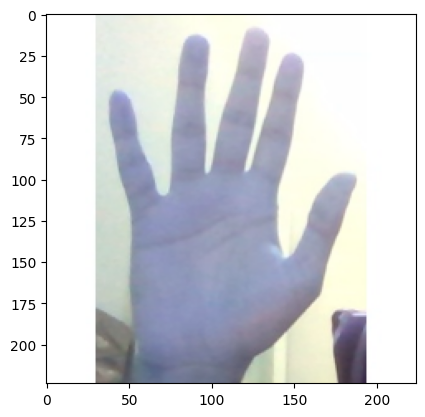

In [124]:
import matplotlib.pylab as plt
plt.imshow(image_read_1)

In [125]:
model_loaded.history

In [126]:
print(model_loaded.history)

In [129]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [130]:
history.history['val_accuracy']

[0.7549999952316284,
 0.7149999737739563,
 0.8500000238418579,
 0.8700000047683716,
 0.8500000238418579,
 0.8650000095367432,
 0.8683333396911621,
 0.8683333396911621,
 0.8666666746139526,
 0.8583333492279053]

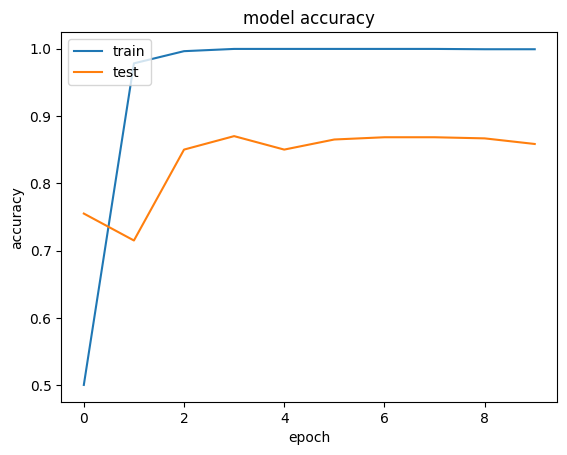

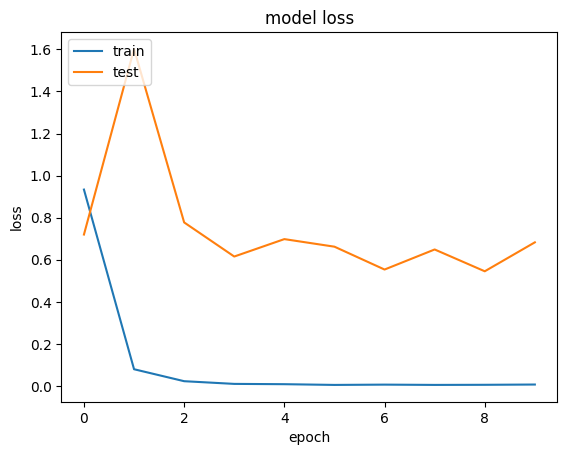

In [131]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [33]:
import cv2 as cv
import numpy as np
path = r"C:\Users\Public\Pictures\Sample Pictures\Hydrangeas.jpg"
img = cv.imread(path)
normalizedImg = np.zeros((800, 800))
normalizedImg = cv.normalize(img,  normalizedImg, 0, 255, cv.NORM_MINMAX)
cv.imshow('dst_rt', normalizedImg)

error: OpenCV(4.8.1) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:971: error: (-215:Assertion failed) size.width>0 && size.height>0 in function 'cv::imshow'


helleldf


Optimal solution:
m1 = 0.04881355932203389
m2 = 0.0
m3 = 0.027118644067796616
Minimized value of y = 0.0023105084745762713


C:\Users\Ali\AppData\Local\Temp\ipykernel_3508\463411388.py:23: DeprecationWarning: `method='simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  result = linprog(c, A_ub=A, b_ub=b, A_eq=A_eq, b_eq=b_eq, bounds=bounds, method='simplex')
